In [2]:
from gensim.models import Word2Vec

In [3]:
import requests
from bs4 import BeautifulSoup
import time
import undetected_chromedriver as uc
import spacy
import re
import nltk
import pandas as pd
from collections import Counter
from selenium.webdriver.common.by import By
from gensim.models import Word2Vec
from nltk.tokenize import sent_tokenize
import tensorflow as tf

nltk.download('stopwords')
nlp = spacy.load('en_core_web_sm')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Poorn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Task 1 : Develop a Python application that uses TF-IDF to extract features from text data and trains a classifier (e.g., SVM, Naive Bayes) for document classification. 


In [4]:
df = pd.read_csv('ipl-2024-04-22.csv')
# Removing the duplicates
df.drop_duplicates(inplace=True)

# Removing the null values
df.dropna(inplace=True)

# Feature Enineering: Converting text output to an integer.
df['score_converted'] = df['score'].apply(lambda x: 8 if x == 'W' else int(x))

from sklearn.feature_extraction.text import TfidfVectorizer


tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['comment'])

X = tfidf_matrix
y = df['score_converted']

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Spliting the data for training 70% and testing 30% 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

# SVC with the kernel linear 
svm_classifier = SVC(kernel='linear')

# svm_classifier = SVC(kernel='poly', degree=3)

# Trainning model classifier
svm_classifier.fit(X_train, y_train)

y_pred_svm = svm_classifier.predict(X_test)

# Calculate accuracy
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", svm_accuracy)


FileNotFoundError: [Errno 2] No such file or directory: 'ipl-2024-04-22.csv'

#### Task:2 Create a Python application that implements a simple item-based recommender system using cosine similarity between item vectors (e.g., user ratings) to suggest similar items to users. 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
df = pd.read_csv('imdb_movies.csv')
df.dropna(inplace=True)


tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['overview'])
feature_names = tfidf_vectorizer.get_feature_names()

movie_title = 'Eight Below'
eight_below_text = df[df['names'] == movie_title]['overview']
tfif_eight_below = tfidf_vectorizer.transform(eight_below_text)
randomly_taken_movie = df['overview'].sample()
random_moive_index = randomly_taken_movie.index
random_movie_overivew = tfidf_vectorizer.transform(randomly_taken_movie)
similarity_of_2_movies = cosine_similarity(tfif_eight_below,random_movie_overivew)[0][0]
print(f'The similiarity between the movie {movie_title} and {df.loc[random_moive_index,["names"]]} is {similarity_of_2_movies}')


NameError: name 'pd' is not defined

##### Task 3: Create a Python application that visualizes the cosine similarity matrix between a set of data points (e.g., documents, images, nodes) using heatmaps or network graphs. 

Random 10 movies chosen are:                                                 names
4180  Fate/kaleid liner Prisma☆Illya: Vow in the Snow
807                                          Hercules
2960                                          Platoon
5663                                 Secret Obsession
1591                       Rurouni Kenshin: The Final
7963                                             Cats
4131                                           Oxygen
8027                         A Princess for Christmas
3910                                Quest for Camelot
2257                                       Robin Hood


Text(0.5, 1.0, 'Cosine Similarity of Random 10 movies')

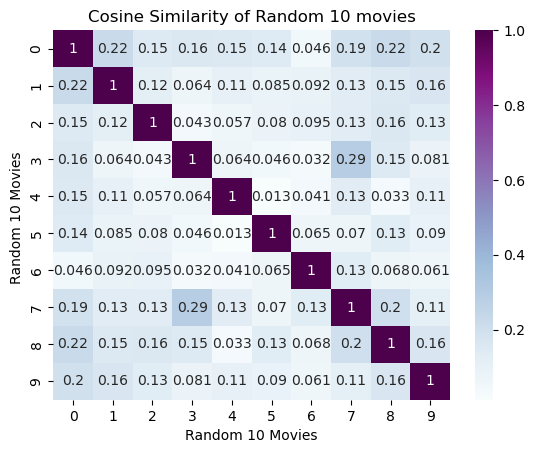

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#  Randomly selecting top 10 movies
random_10_movie = df['overview'].sample(10)

# Index of those selected  
random_10_movie_indexes = random_10_movie.index

# Converting text to TFIDF vector.
random_movies_tf_idf = tfidf_vectorizer.fit_transform(random_10_movie)
similarity_of_10_movies = cosine_similarity(random_movies_tf_idf,random_movies_tf_idf)
print(f"Random 10 movies chosen are: {df.loc[random_10_movie_indexes,['names']]}")

# Heatmap for top 10 similar movies
sns.heatmap(similarity_of_10_movies, annot=True,cmap="BuPu")

plt.xlabel("Random 10 Movies")
plt.ylabel("Random 10 Movies ")
plt.title("Cosine Similarity of Random 10 movies")


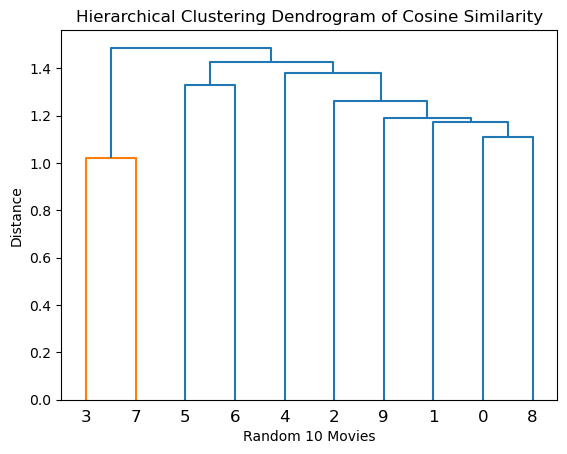

In [ ]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt


dendrogram = sch.dendrogram(sch.linkage(similarity_of_10_movies, method='ward'))

# Dendogram for Random 10 movies
plt.title("Hierarchical Clustering Dendrogram of Cosine Similarity")
plt.xlabel("Random 10 Movies")
plt.ylabel("Distance")
plt.show()
